# Introduction to regression with Neural Networks in TensorFlow

What is regression problem?
Its statistical modeling, regression analysis by identifying relation between dependant and independent variables.

### Examples:
How much will this house sell for ?
How many people will buy this app?
What will be borders of object in a image or video ? predict bounding boxes of target object.
How much will my health insurance be?


In [ ]:
# Regression inputs features and outputs

# Input features: Bedroom , Bathroom , Garage (Independent variables)
# Output feature: Selling price (Dependent variable(s))
# Anatomy of Neural Networks (Input layer -> Hidden Layer -> Output layer)
# Hyperparameters - config parameters for model prediction

import tensorflow as tf
print(tf.__version__)

2.8.2


## Creating data to view and fit

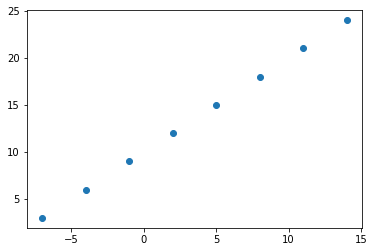

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Create features
X = np.array([-7.0,-4.0,-1.0,2.0,5.0,8.0,11.0,14.0])

# Create labels
y= np.array([3.0,6.0,9.0,12.0,15.0,18.0,21.0,24.0])

# Visualize it
plt.scatter(X,y)

y == X + 10

In [ ]:
# Turn our numpy to tensors

X = tf.constant(X)
y = tf.constant(y)
X,y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

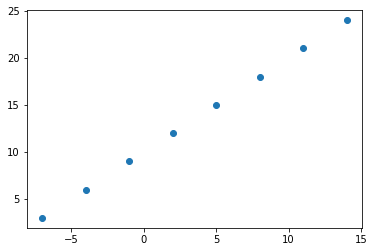

In [ ]:
plt.scatter(X,y)

In [ ]:
## Steps in modelling with TensorFlow

tf.random.set_seed(42)

#1. Create a model using Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

#model = tf.keras.Sequential()
#model.add(tf.keras.layers.Dense(1))

#2. compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

#3. Fit the model
model.fit(tf.expand_dims(X,axis=-1),y,epochs=5)



Epoch 1/5
1/1 [==============================] - 1s 1s/step - loss: 11.5048 - mae: 11.5048
Epoch 2/5
1/1 [==============================] - 0s 16ms/step - loss: 11.3723 - mae: 11.3723
Epoch 3/5
1/1 [==============================] - 0s 10ms/step - loss: 11.2398 - mae: 11.2398
Epoch 4/5
1/1 [==============================] - 0s 8ms/step - loss: 11.1073 - mae: 11.1073
Epoch 5/5
1/1 [==============================] - 0s 10ms/step - loss: 10.9748 - mae: 10.9748


In [ ]:
X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [ ]:
# Try and make a prediction using trained model
model.predict([17.0])

array([[12.716021]], dtype=float32)

In [ ]:
#1. Create a model using Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(100,activation="relu"),                         
    tf.keras.layers.Dense(1)
])

#model = tf.keras.Sequential()
#model.add(tf.keras.layers.Dense(1))

#2. compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              metrics=["mae"])

#3. Fit the model(train the model longer)
model.fit(tf.expand_dims(X,axis=-1),y,epochs=2000)

Epoch 1/2000
1/1 [==============================] - 1s 581ms/step - loss: 14.3099 - mae: 14.3099
Epoch 2/2000
1/1 [==============================] - 0s 22ms/step - loss: 14.2781 - mae: 14.2781
Epoch 3/2000
1/1 [==============================] - 0s 25ms/step - loss: 14.2469 - mae: 14.2469
Epoch 4/2000
1/1 [==============================] - 0s 11ms/step - loss: 14.2158 - mae: 14.2158
Epoch 5/2000
1/1 [==============================] - 0s 15ms/step - loss: 14.1840 - mae: 14.1840
Epoch 6/2000
1/1 [==============================] - 0s 13ms/step - loss: 14.1522 - mae: 14.1522
Epoch 7/2000
1/1 [==============================] - 0s 9ms/step - loss: 14.1204 - mae: 14.1204
Epoch 8/2000
1/1 [==============================] - 0s 9ms/step - loss: 14.0885 - mae: 14.0885
Epoch 9/2000
1/1 [==============================] - 0s 9ms/step - loss: 14.0568 - mae: 14.0568
Epoch 10/2000
1/1 [==============================] - 0s 10ms/step - loss: 14.0250 - mae: 14.0250
Epoch 11/2000
1/1 [======================

In [ ]:
# Predict with new model
model.predict([17.0])

array([[27.79176]], dtype=float32)

When it comes to evaluation..... there are 3 words you should memorize.
> "Visualize"
It's a good idea to visualize

In [ ]:
# Make a bigger dataset
X = tf.range(-100,100,4)
# Make labels for the dataset
y = X + 10
X,y

(<tf.Tensor: shape=(50,), dtype=int32, numpy=
 array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
         -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
         -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
          32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
          76,   80,   84,   88,   92,   96], dtype=int32)>,
 <tf.Tensor: shape=(50,), dtype=int32, numpy=
 array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
        -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
         14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
         66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>)

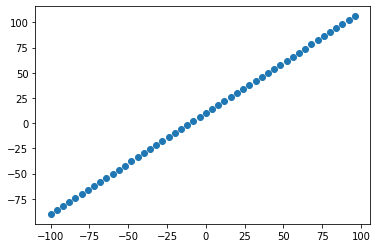

In [ ]:
# Visualize the data
import matplotlib.pyplot as plt
plt.scatter(X,y)

### The 3 sets.....
*  Training Set - The model learns from this data, which is typically 70-80% of data
*  Validation Set - The model gets tuned on this data , which is typically 10-15%
*  Test Set = The model gets evaluated on this data to test what is learned, this set is typically 10-15%

In [ ]:
# Check the length of how many samples we have
len(X)

50

In [ ]:
# Split the data into train and test sets
X_train = X[:40] # first 40 training samples
y_train = y[:40]

X_test = X[40:] # last 10 are the testing samples(20%)
y_test = y[40:]

len(X_train), len(X_test) , len(y_train), len(y_test)

(40, 10, 40, 10)

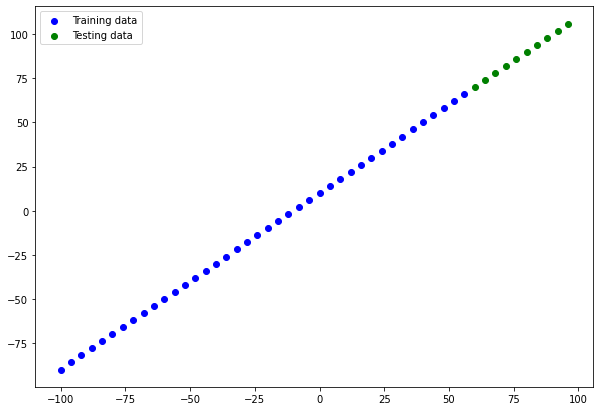

In [ ]:
# Visualizing data
plt.figure(figsize=(10,7))
# Plot training data in blue
plt.scatter(X_train,y_train,c="b",label="Training data")
# Plot test data in green
plt.scatter(X_test,y_test,c="g",label="Testing data")
#Show legend.
plt.legend()

In [ ]:
# Let's have a look at how to build neural network for our data
# 1. Create a model
model = tf.keras.Sequential([
         tf.keras.layers.Dense(1)               
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# 3. Fit the model
# model.fit(X_train,y_train,epochs=100)

#model.summary()

In [ ]:

tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(100,input_shape=[1],name="input_layer"),
    tf.keras.layers.Dense(1,name="output_layer")
], name="model_1")

model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              metrics=["mae"])
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 100)               200       
                                                                 
 output_layer (Dense)        (None, 1)                 101       
                                                                 
Total params: 301
Trainable params: 301
Non-trainable params: 0
_________________________________________________________________


Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 100)               200       
                                                                 
 output_layer (Dense)        (None, 1)                 101       
                                                                 
Total params: 301
Trainable params: 301
Non-trainable params: 0
_________________________________________________________________


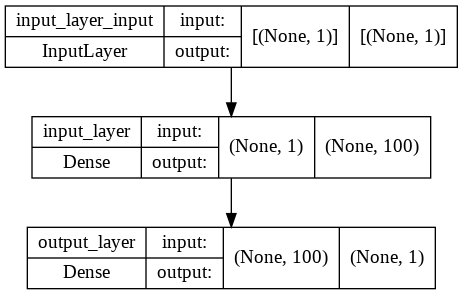

In [ ]:
model.fit(X_train,y_train,epochs=2000,verbose=0)
model.summary()

from tensorflow.keras.utils import plot_model

plot_model(model=model,show_shapes=True)

In [ ]:
# Visualize predictions

# Make some predictions
y_pred = model.predict(X_test)
y_pred

array([[ 66.63812],
       [ 70.53621],
       [ 74.43428],
       [ 78.33236],
       [ 82.23044],
       [ 86.12851],
       [ 90.02657],
       [ 93.92466],
       [ 97.82275],
       [101.72082]], dtype=float32)

In [ ]:
# Lets create a plotting function
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=y_pred):
  """
   Plots training data , test data and predictions
  """

  plt.figure(figsize=(10,7))
  plt.scatter(train_data,train_labels,c="b",label="Training Data")
  plt.scatter(test_data,test_labels,c="g",label="Testing Data")
  plt.scatter(test_data,predictions,c="r",label="Predictions")
  plt.legend()

In [ ]:
# inspect data
X_train,y_train,X_test,y_test,y_pred

(<tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
         -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
         -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
          32,   36,   40,   44,   48,   52,   56], dtype=int32)>,
 <tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
        -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
         14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
         66], dtype=int32)>,
 <tf.Tensor: shape=(10,), dtype=int32, numpy=array([60, 64, 68, 72, 76, 80, 84, 88, 92, 96], dtype=int32)>,
 <tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>,
 array([[ 66.63812],
        [ 70.53621],
        [ 74.43428],
        [ 78.33236],
        [ 82.23044],
        [ 86.12851],
        [ 90.02657],

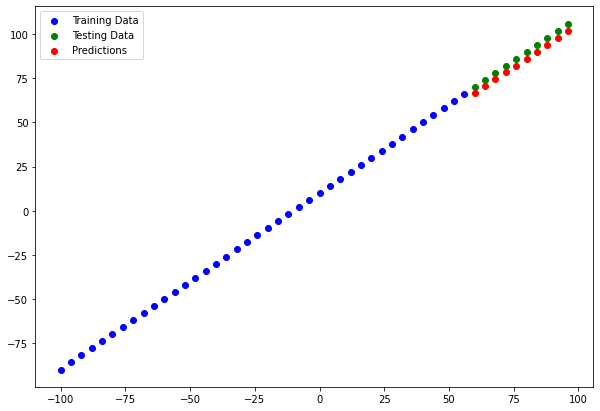

In [ ]:
plot_predictions()

### Evaluating our model's predictions with metrics
Two main metrics as we are working on regression problem.
* MAE - Mean Absolute problem. On Averange how wrong are the predictions
* MSE - Mean Square Error. When larger errors are more , significant than small errors.
* Huber - Combination of MAE , MSE.

In [ ]:
model.evaluate(X_test,y_test) # Prints loss , mean absolute error

1/1 [==============================] - 0s 277ms/step - loss: 3.8205 - mae: 3.8205


[3.820528507232666, 3.820528507232666]

In [ ]:
# Calculate the mean square error
print(y_pred , y_test)
mae = tf.metrics.mean_absolute_error(y_test,tf.constant(y_pred))
print('mean_absolute_error ',mae)
print('Difference ',y_pred - y_test)


[[ 66.63812]
 [ 70.53621]
 [ 74.43428]
 [ 78.33236]
 [ 82.23044]
 [ 86.12851]
 [ 90.02657]
 [ 93.92466]
 [ 97.82275]
 [101.72082]] tf.Tensor([ 70  74  78  82  86  90  94  98 102 106], shape=(10,), dtype=int32)
mean_absolute_error  tf.Tensor(
[21.361877 17.571033 14.539432 12.267056 10.753912 10.       10.005315
 10.784932 12.329099 14.63249 ], shape=(10,), dtype=float32)
Difference  tf.Tensor(
[[ -4  -8 -12 -16 -20 -24 -28 -32 -36 -40]
 [  0  -4  -8 -12 -16 -20 -24 -28 -32 -36]
 [  4   0  -4  -8 -12 -16 -20 -24 -28 -32]
 [  8   4   0  -4  -8 -12 -16 -20 -24 -28]
 [ 12   8   4   0  -4  -8 -12 -16 -20 -24]
 [ 16  12   8   4   0  -4  -8 -12 -16 -20]
 [ 20  16  12   8   4   0  -4  -8 -12 -16]
 [ 23  19  15  11   7   3  -1  -5  -9 -13]
 [ 27  23  19  15  11   7   3  -1  -5  -9]
 [ 31  27  23  19  15  11   7   3  -1  -5]], shape=(10, 10), dtype=int32)


In [ ]:
# Calculate the mean absolute error
y_pred.shape,y_test.shape,tf.squeeze(y_pred).shape
# print(y_pred , y_test)
mae = tf.metrics.mean_absolute_error(y_true=y_test,y_pred=tf.squeeze(y_pred))
print('mean_absolute_error ',mae.numpy())

# Calculate the mean square error
mse = tf.metrics.mean_squared_error(y_true=y_test,y_pred=y_pred)
print('mean_squared_error ',mae.numpy())


mean_absolute_error  3.8205285
mean_squared_error  3.8205285


In [ ]:
# Make functions to reuse mae , mse
def mae(y_true,y_pred):
  return tf.metrics.mean_absolute_error(y_true=y_test,y_pred=tf.squeeze(y_pred))

def mse(y_true,y_pred):
  return tf.metrics.mean_squared_error(y_true=y_test,y_pred=tf.squeeze(y_pred))


### Running experiments to improve our model
```
Build a model -> fit it -> evaluate it -> tweak it -> fit it -> evaluate it
```

1. Get more data to train the model
2. Make your model larger(using a more complex model) - this might come in the form of more layers , more hidden plt.uninstall_repl_displayhook
3. Train for longer

3 modelling experiments:
1. `model_1` - same as original model with 100 epochs
2. 'model_2` - 2 layers , trained for 100 epochs
3. `model_3` - 2 layers , trained for 500 epochs
4. `model_4` -


In [ ]:
### Model Overfitting ,learned too much


* TensorBoard - a component of TF lib to track modelling experiments.
* Weights & Biases

In [ ]:
## Saving our models 
## Two formats to save models
### The SaveModel format
### The HDF5 format
model.save('best_model_SaveModel_format')

INFO:tensorflow:Assets written to: best_model_SaveModel_format/assets


In [ ]:
### Save in HDF5 format
model.save('best_model_HDF5_format.h5')

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 100)               200       
                                                                 
 output_layer (Dense)        (None, 1)                 101       
                                                                 
Total params: 301
Trainable params: 301
Non-trainable params: 0
_________________________________________________________________
mae::  3.8205285


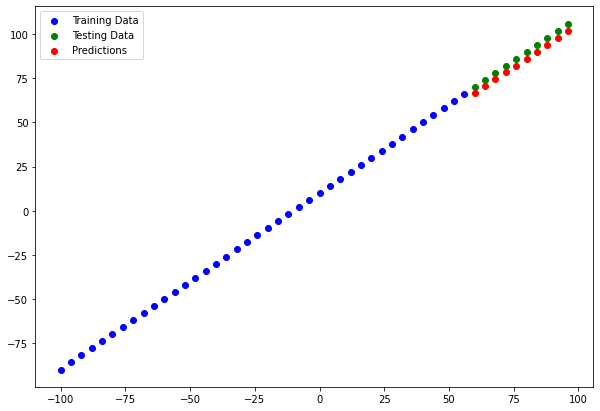

In [ ]:
loaded_SavedModel = tf.keras.models.load_model("/content/best_model_SaveModel_format")
loaded_SavedModel.summary()
loaded_preds = loaded_SavedModel.predict(X_test)
plot_predictions(predictions=loaded_preds)
print('mae:: ',mae(y_true=y_test,y_pred=loaded_preds).numpy())

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 100)               200       
                                                                 
 output_layer (Dense)        (None, 1)                 101       
                                                                 
Total params: 301
Trainable params: 301
Non-trainable params: 0
_________________________________________________________________
mae :: 3.8205285


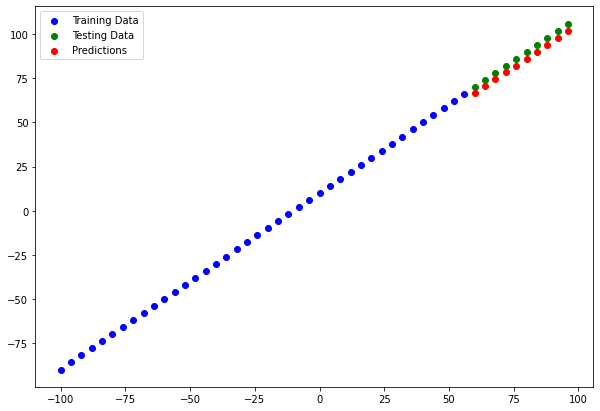

In [ ]:
# Load h5 model
loaded_h5_model = tf.keras.models.load_model("best_model_HDF5_format.h5")
loaded_h5_model.summary()
loaded_h5_preds = loaded_h5_model.predict(X_test)
plot_predictions(predictions=loaded_h5_preds)
print('mae ::',mae(y_true=y_test,y_pred=loaded_h5_preds).numpy())

In [ ]:
# Download file from colab using code
from google.colab import files
files.download("/content/best_model_HDF5_format.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Copy from colab to google drive
!cp "/content/best_model_HDF5_format.h5" "/content/drive/MyDrive/Colab Notebooks/TensorFlow Developer Certificate 2022"

In [ ]:
# list copied file
!ls "/content/drive/MyDrive/Colab Notebooks/TensorFlow Developer Certificate 2022"

00_tensorflow_fundamentals.ipynb		  best_model_HDF5_format.h5
01_neural_network_regression_in_tensorflow.ipynb


## A Larger dataset

In [ ]:
# Import required libraries
import pandas as pd
import tensorflow
import matplotlib.pyplot as plt

# Read in the insurance dataset
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
# Dependent Variables/Output = charges
# Independent Variables/Features = age,sex,bmi,children,smoker,region

insurance["smoker"].dtype, insurance["age"].dtype

(dtype('O'), dtype('int64'))

In [ ]:
# One-Hot encoding all non-numerical features to numerical
insurance_one_hot = pd.get_dummies(insurance)
insurance_one_hot.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [ ]:
# Create X & y values(features and labels)
X = insurance_one_hot.drop("charges",axis=1)
y = insurance_one_hot["charges"]

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [ ]:
#View X
X.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0


In [ ]:
#View Y
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [ ]:
# Create training and test sets
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test =train_test_split(X,y,test_size=0.2,random_state=42)
len(X) , len(X_train), len(X_test)

(1338, 1070, 268)

In [ ]:
X_train.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
560,46,19.95,2,1,0,1,0,0,1,0,0
1285,47,24.32,0,1,0,1,0,1,0,0,0
1142,52,24.86,0,1,0,1,0,0,0,1,0
969,39,34.32,5,1,0,1,0,0,0,1,0
486,54,21.47,3,1,0,1,0,0,1,0,0


In [ ]:
# Build a neural network
tf.random.set_seed(42)

#1. Create a model
insurance_model = tf.keras.Sequential([
        tf.keras.layers.Dense(10),
        tf.keras.layers.Dense(1)
])

#2. Complile the model
insurance_model.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.SGD(),
                        metrics=["mae"])
#3. Fit the model
insurance_model.fit(X_train,y_train,epochs=100,verbose=1)

Epoch 1/100
34/34 [==============================] - 1s 4ms/step - loss: 8637.1006 - mae: 8637.1006
Epoch 2/100
34/34 [==============================] - 0s 4ms/step - loss: 7886.7759 - mae: 7886.7759
Epoch 3/100
34/34 [==============================] - 0s 3ms/step - loss: 7558.1470 - mae: 7558.1470
Epoch 4/100
34/34 [==============================] - 0s 3ms/step - loss: 7792.0225 - mae: 7792.0225
Epoch 5/100
34/34 [==============================] - 0s 2ms/step - loss: 7748.3887 - mae: 7748.3887
Epoch 6/100
34/34 [==============================] - 0s 3ms/step - loss: 7595.3940 - mae: 7595.3940
Epoch 7/100
34/34 [==============================] - 0s 3ms/step - loss: 7589.9844 - mae: 7589.9844
Epoch 8/100
34/34 [==============================] - 0s 3ms/step - loss: 7698.5576 - mae: 7698.5576
Epoch 9/100
34/34 [==============================] - 0s 2ms/step - loss: 7496.7778 - mae: 7496.7778
Epoch 10/100
34/34 [==============================] - 0s 3ms/step - loss: 7493.1743 - mae: 7493.1743

In [ ]:
# Check the results of the insurance model on the test data
insurance_model.evaluate(X_test,y_test)

9/9 [==============================] - 0s 3ms/step - loss: 7023.3291 - mae: 7023.3291


[7023.3291015625, 7023.3291015625]

In [ ]:
y_train.median(), y_train.mean()

(9575.4421, 13346.089736364489)

Model is not peforming that well , lets improve it.

Experiment #1: Add an extra layer with more hidden units. Change optimizer to Adam , add one extra layers.

Experiment #2: Train model longer

In [ ]:
# Set random seed
tf.random.set_seed(42)

#1. Create the model
insurance_model_2 = tf.keras.Sequential([
   tf.keras.layers.Dense(100),
   tf.keras.layers.Dense(10),
   tf.keras.layers.Dense(1),                                      
])

# 2. Compile the model
insurance_model_2.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics="mae")

# 3. Fit the model
insurance_model_2.fit(X_train,y_train,epochs=100,verbose=1)

Epoch 1/100
34/34 [==============================] - 1s 3ms/step - loss: 13273.1602 - mae: 13273.1602
Epoch 2/100
34/34 [==============================] - 0s 3ms/step - loss: 13104.4297 - mae: 13104.4297
Epoch 3/100
34/34 [==============================] - 0s 3ms/step - loss: 12749.5420 - mae: 12749.5420
Epoch 4/100
34/34 [==============================] - 0s 3ms/step - loss: 12055.7500 - mae: 12055.7500
Epoch 5/100
34/34 [==============================] - 0s 4ms/step - loss: 10905.8154 - mae: 10905.8154
Epoch 6/100
34/34 [==============================] - 0s 4ms/step - loss: 9457.7217 - mae: 9457.7217
Epoch 7/100
34/34 [==============================] - 0s 3ms/step - loss: 8147.6543 - mae: 8147.6543
Epoch 8/100
34/34 [==============================] - 0s 4ms/step - loss: 7528.8413 - mae: 7528.8413
Epoch 9/100
34/34 [==============================] - 0s 3ms/step - loss: 7429.1528 - mae: 7429.1528
Epoch 10/100
34/34 [==============================] - 0s 4ms/step - loss: 7409.0811 - mae:

In [ ]:
insurance_model.evaluate(X_test,y_test) , insurance_model_2.evaluate(X_test,y_test)

9/9 [==============================] - 0s 2ms/step - loss: 4924.3477 - mae: 4924.3477


([7023.3291015625, 7023.3291015625], [4924.34765625, 4924.34765625])

In [ ]:
# Experiment #2 

#Set random seed
tf.random.set_seed(42)

#Create a model
insurance_model_3 = tf.keras.Sequential([
      tf.keras.layers.Dense(100),
      tf.keras.layers.Dense(10),
      tf.keras.layers.Dense(1)               
])

# compile the mode
insurance_model_3.compile(loss=tf.keras.losses.mae,
                      optimizer=tf.keras.optimizers.Adam(),
                      metrics="mae")
# Fit the model
model3_history= insurance_model_3.fit(X_train,y_train,epochs=200)

In [ ]:
# Evaluate insurance_model_3
insurance_model.evaluate(X_test,y_test),insurance_model_2.evaluate(X_test,y_test),insurance_model_3.evaluate(X_test,y_test)

9/9 [==============================] - 1s 8ms/step - loss: 3491.2961 - mae: 3491.2961


([7023.3291015625, 7023.3291015625],
 [4924.34765625, 4924.34765625],
 [3491.296142578125, 3491.296142578125])

Text(0.5, 0, 'epochs')

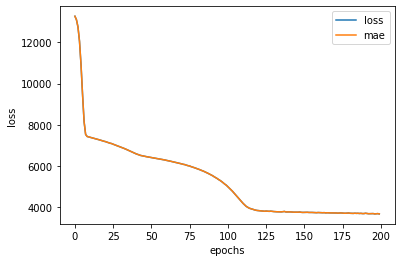

In [ ]:
# Plot history(also know as loss curve or training curve)
pd.DataFrame(model3_history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

In [ ]:
# Experiment #3 - Early stopping callback

#Set random seed
tf.random.set_seed(42)

#Create a model
insurance_model_4 = tf.keras.Sequential([
      tf.keras.layers.Dense(100),
      tf.keras.layers.Dense(10),
      tf.keras.layers.Dense(1)    
])

# compile the mode
insurance_model_4.compile(loss=tf.keras.losses.mae,
                      optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
                      metrics="mae")
# Fit the model
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)
model4_history= insurance_model_4.fit(X_train,y_train,epochs=500,callbacks=[callback])

Text(0, 0.5, 'loss')

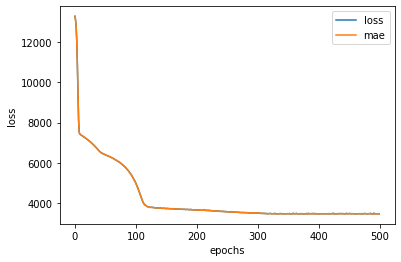

In [ ]:
# Plot model4 history
pd.DataFrame(model4_history.history).plot()
plt.xlabel("epochs")
plt.ylabel("loss")

In [ ]:
insurance_model_3.evaluate(X_test,y_test) , insurance_model_4.evaluate(X_test,y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3624.6331 - mae: 3624.6331


([3491.296142578125, 3491.296142578125],
 [3624.633056640625, 3624.633056640625])

#Preprocessing data(Normalization and standarization)

In terms of scaling values nueral networks tend to prefer normalization.

If not sure try, both normalization and standardization see what works.

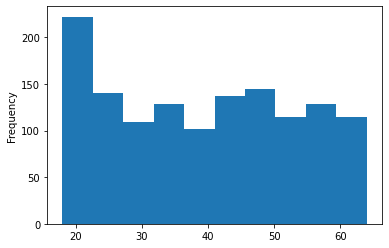

In [ ]:
X["age"].plot(kind="hist")

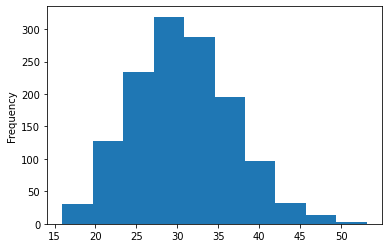

In [ ]:
X["bmi"].plot(kind="hist")

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Read in the insurance dataset
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


## To prepare our data , we borrow few functions from sklearn

In [ ]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler , OneHotEncoder

# Create a column transformer
ct = make_column_transformer(
    (MinMaxScaler(),["age","bmi","children"]),
    (OneHotEncoder(handle_unknown="ignore"),["sex","smoker","region"])
)

# Create X & y
X = insurance.drop("charges",axis=1)
y = insurance["charges"]

#Build our train and test data
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

# Fit the column transformer to our training data
ct.fit(X_train)

#Transform training and test data with normalization (MinMaxScalaer) and OneHotEncoder
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)
#X_train,X_test
X_train_normal.shape , X_test_normal.shape

((1070, 11), (268, 11))

In [ ]:
# What does our data looks like now.
print(X_train.loc[1],X_train_normal[1])
print(X_train.shape,X_train_normal.shape)

age                18
sex              male
bmi             33.77
children            1
smoker             no
region      southeast
Name: 1, dtype: object [0.63043478 0.22491256 0.         1.         0.         1.
 0.         1.         0.         0.         0.        ]
(1070, 6) (1070, 11)


Our data is normalized and one hot encoded.
Now lets build the model and evaluate it.

In [ ]:
# set random seed
tf.random.set_seed(42)

# 1. create model
insurance_model_5 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)                                         
])

# 2. Compile the model
insurance_model_5.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=["mae"])

# 3. Fit the model
insurance_model_5.fit(X_train_normal,y_train,epochs=100,verbose=1)

In [ ]:
# Evaluate our insurance model trained on normalized data
insurance_model_5.evaluate(X_test_normal,y_test)

9/9 [==============================] - 0s 3ms/step - loss: 3438.7844 - mae: 3438.7844


[3438.784423828125, 3438.784423828125]

In [ ]:
insurance_model_5.summary()

Model: "sequential_49"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_140 (Dense)           (None, 100)               1200      
                                                                 
 dense_141 (Dense)           (None, 10)                1010      
                                                                 
 dense_142 (Dense)           (None, 1)                 11        
                                                                 
Total params: 2,221
Trainable params: 2,221
Non-trainable params: 0
_________________________________________________________________


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Read in the insurance dataset
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


Text(0.5, 1.0, 'Insurance data features')

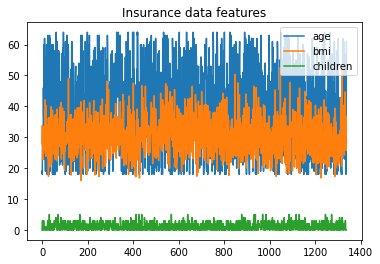

In [ ]:
insurance_features=insurance.drop("charges",axis=1)
insurance_features.plot()
plt.title("Insurance data features")

Text(0.5, 1.0, 'One-Hot encoded Insurance features')

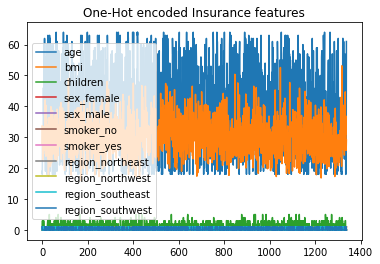

In [ ]:
import tensorflow as tf

one_hot_insurance = pd.get_dummies(insurance_features)
one_hot_insurance.plot()
plt.title("One-Hot encoded Insurance features")